In [1]:
# Explanation of prediction output when activation is sigmoid:
# https://forum.freecodecamp.org/t/model-predict-output/470349

import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

BASE_PATH = "../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"predict_example_01/"
os.system("mkdir -p " + OUTPUT_PATH)


# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)

print(f"Number of test samples: {test_dataset.cardinality()}")


# Preprocess the data
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [256, 256])
    image = image / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

batch_size = 64
train_dataset = train_dataset.cache().batch(batch_size).prefetch(buffer_size=10)
test_dataset = test_dataset.cache().batch(batch_size).prefetch(buffer_size=10)

# Load model
filename = "epochs_5.000_date_20250708-215035.h5"
filename = "acc_0.966_epochs_8.000_date_20250710-211155.h5"
filename = "acc_0.703_epochs_1.000_date_20250711-141215.h5"
filename = "acc_0.742_epochs_1.000_date_20250711-142521.h5"
fullpath = f"{OUTPUT_PATH}{filename}"
model = load_model(fullpath)
# model.summary()


# Make predictions
predictions = model.predict(test_dataset)
allpreds=predictions.flatten()
allpnorms = np.where(allpreds > 0.5, 1, 0)

alllabels=np.empty(0)
for images, labels in test_dataset:
    alllabels = np.append(alllabels, labels.numpy().flatten())

score = metrics.accuracy_score(alllabels, allpnorms)
print("Validation accuracy score: {}".format(score))

collabels = pd.DataFrame(alllabels, columns=["l"])
colpreds = pd.DataFrame( allpreds, columns=["pred"])
pnorm = pd.DataFrame( allpnorms, columns=["pnorm"])
diff = collabels["l"] - pnorm["pnorm"]

compare = pd.concat([collabels, colpreds,pnorm,diff], axis=1)
compare.columns = ["l", "pred", "pnorm","diff"]
# print(compare)

compare.to_csv(OUTPUT_PATH + "pred_test_load.csv", index=False)    

2025-07-15 21:05:05.924604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-15 21:05:05.924639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-15 21:05:05.925483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-15 21:05:05.930489: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-15 21:05:08.215948: I exter

Number of test samples: 233


2025-07-15 21:05:15.734292: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


4/4 [==============================] - 1s 81ms/step
Validation accuracy score: 0.7424892703862661


Number of correct: 173
range(6, 9)


,image,label,predictions,pred norm,correct
0,,0 (cat),0.571067,1,False
1,,1 (dog),0.966877,1,True
2,,1 (dog),0.433635,0,False

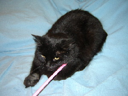
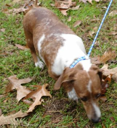
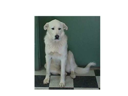

In [5]:
# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)
allcorrect = (allpnorms == alllabels)
print("Number of correct:",allcorrect.sum())

number_of_images=3
block=2

start=block*number_of_images
stop=start+number_of_images
indices=range(start,stop)
print(indices)
subset=test_dataset.skip(start).take(number_of_images)

new_df=tfds.as_dataframe(subset, metadata)
# new_df
new_df['predictions'] = allpreds[indices]
new_df['pred norm'] = allpnorms[indices]
new_df['correct'] = allcorrect[indices]
new_df

